In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "ChengChurch"
tool_suffix = "ChengChurch"
n_runs = 1

parameters = (("alpha",[1,1.1,1.2,1.3,1.4,1.5]),
              ("delta",[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [4]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/ChengChurch/alpha=1.5.delta=1/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.ChengChurch.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.13857353390034305


In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.1/simulated.N=10.Mu=2.0.GxP=

File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.ChengChurch.biclust_results.txt
Failed to parse ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.ChengChurch.biclust_results.txt
File not found ../simulated_datasets/results/ChengChurch/alpha=1.delta=0.7/simulated.N=10.Mu=2.0.GxP=

Parameter combiations not found: 0
Successfull parameter combinations: 60
	files not found: 380
	files empty: 0
	failed to parse: 380
Total runs 1200
Non-zero runs: 365


In [6]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,alpha,delta,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,1.0,0.1,10,0.000000,0.000000,0.000000
1,5,20,1.0,0.1,0,0.000000,0.000000,0.000000
2,5,50,1.0,0.1,0,0.000000,0.000000,0.000000
3,5,100,1.0,0.1,0,0.000000,0.000000,0.000000
4,10,10,1.0,0.1,0,0.000000,0.000000,0.000000
5,10,20,1.0,0.1,0,0.000000,0.000000,0.000000
6,10,50,1.0,0.1,0,0.000000,0.000000,0.000000
7,10,100,1.0,0.1,0,0.000000,0.000000,0.000000
8,20,10,1.0,0.1,0,0.000000,0.000000,0.000000
9,20,20,1.0,0.1,0,0.000000,0.000000,0.000000


In [7]:
parameters

(('alpha', [1, 1.1, 1.2, 1.3, 1.4, 1.5]),
 ('delta', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

Total combinations: 60
[(1.4, 1.0) (1.2, 1.0) (1.3, 1.0) (1.5, 1.0) (1.5, 0.9) (1.4, 0.9)
 (1.3, 0.9) (1.2, 0.9) (1.2, 0.8) (1.5, 0.8) (1.4, 0.8) (1.3, 0.8)
 (1.2, 0.7) (1.3, 0.7) (1.5, 0.7) (1.4, 0.7) (1.2, 0.6) (1.5, 0.6)
 (1.4, 0.6) (1.3, 0.6)]
Top 20 paramter combinations


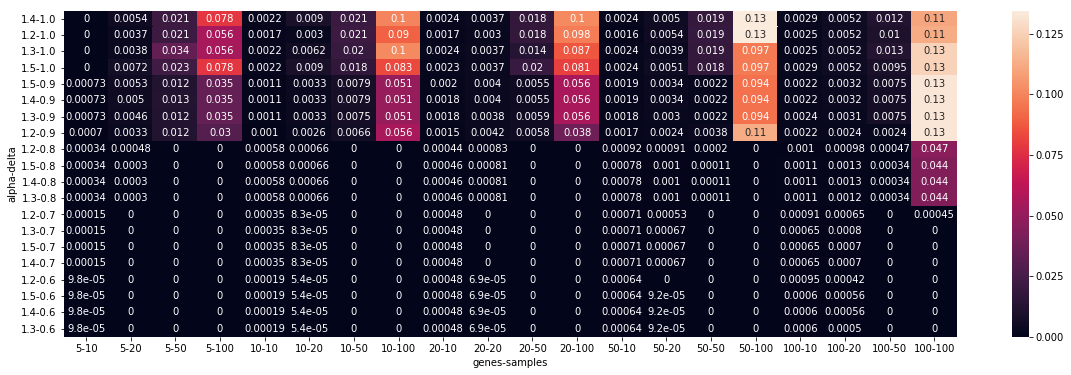

In [16]:
heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,plot_file=plot_file,outfile=heatmap_outfile)

In [17]:
parameters

(('alpha', [1, 1.1, 1.2, 1.3, 1.4, 1.5]),
 ('delta', [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

In [18]:
default_params = (1.5,1.0)

In [19]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 1200 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.03271796560332729
(1.4, 1.0)
0.0	0.01	0.02	0.08	0.0	0.01	0.02	0.1	0.0	0.0	0.02	0.1	0.0	0.0	0.02	0.13	0.0	0.01	0.01	0.11
	alpha=('Geometric_Mean', 'mean');
	delta=('Geometric_Mean', 'std');
	Max. avg. Geometric_Mean: 0.033 ± 0.044
	Max. avg. Relevance: 0.032 ± 0.041
	Max. avg. Recovery: 0.034 ± 0.048
	Max. avg. n_biclusters: 4.85 ± 2.368
With Default parameters:
(1.5, 1.0)
0.0	0.01	0.02	0.08	0.0	0.01	0.02	0.08	0.0	0.0	0.02	0.08	0.0	0.01	0.02	0.1	0.0	0.01	0.01	0.13
	alpha=1.5;
	delta=1.0;
	avg. Geometric_Mean: 0.03 ± 0.039
	avg. Relevance: 0.028 ± 0.035
	avg. Recovery: 0.032 ± 0.045
	avg. n_biclusters: 4.8 ± 2.331


,,Geometric_Mean,Relevance,Recovery,n_biclusters
,,mean,mean,mean,mean
alpha,delta,,,,
1.4,1.0,0.032718,0.031682,0.034135,4.85
